In [55]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.6.0
2.6.0


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [57]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [58]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [59]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

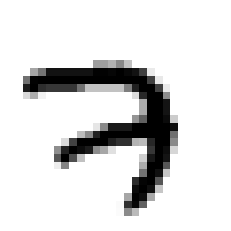

In [60]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

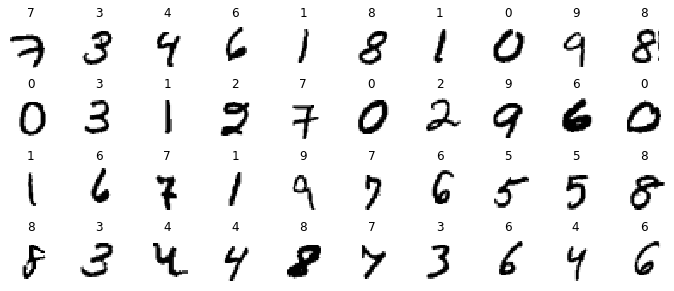

In [61]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [62]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
_________________________________________________________________
flatten_13 (Flatten)         (None, 10)                0         
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [65]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=20)

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 2.2697 - accuracy: 0.2101 - val_loss: 2.2099 - val_accuracy: 0.2958
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 2.0372 - accuracy: 0.5680 - val_loss: 1.7572 - val_accuracy: 0.6788
Epoch 3/20
1719/1719 [==============================] - 12s 7ms/step - loss: 1.4209 - accuracy: 0.7124 - val_loss: 1.1094 - val_accuracy: 0.7722
Epoch 4/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9424 - accuracy: 0.7823 - val_loss: 0.7836 - val_accuracy: 0.8180
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7103 - accuracy: 0.8247 - val_loss: 0.6181 - val_accuracy: 0.8472
Epoch 6/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5856 - accuracy: 0.8507 - val_loss: 0.5228 - val_accuracy: 0.8660
Epoch 7/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5110 - accuracy: 0.8658 - val_loss: 0.4628 - val_accura

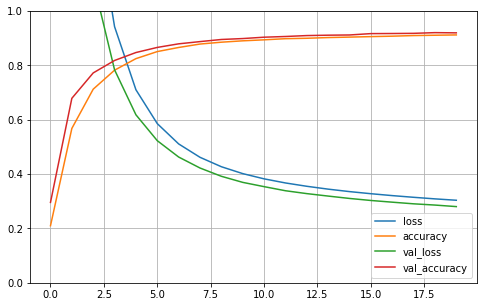

In [66]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.9183


[0.2872094213962555, 0.9182999730110168]

In [68]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

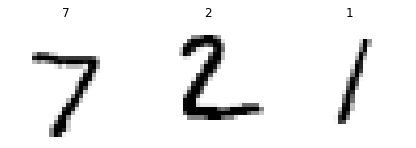

In [69]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()